In [1]:
import sys
sys.path.append("../dataprocessing")
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
# import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from scipy.spatial import distance

## 함수 정의

In [2]:
landmarks = pd.read_csv('../data/images/눈썹들어올리기/202208.23123145716.csv')

In [66]:
landmark_matrixs = []
lp = [point[:-1] for point in landmarks.columns if '-' in point]
set_lp = sorted(set(lp), key = lambda x: lp.index(x))
for idx, row in landmarks.iterrows():
    print(str(idx)+" 하는중")
    temp = pd.DataFrame(index=set_lp, columns=set_lp)
    for mat_row in range(len(lp)):
        for mat_col in range(len(lp)):        
            temp.loc[lp[mat_row]][lp[mat_col]] = distance.euclidean([row[lp[mat_row]+'x'], row[lp[mat_row]+'y']], [row[lp[mat_col]+'x'], row[lp[mat_col]+'y']])
    landmark_matrixs.append(temp)

0 하는중
1 하는중
2 하는중
3 하는중
4 하는중
5 하는중
6 하는중
7 하는중
8 하는중
9 하는중
10 하는중
11 하는중
12 하는중
13 하는중
14 하는중
15 하는중
16 하는중
17 하는중
18 하는중
19 하는중
20 하는중
21 하는중
22 하는중
23 하는중
24 하는중
25 하는중
26 하는중
27 하는중
28 하는중
29 하는중
30 하는중
31 하는중
32 하는중
33 하는중
34 하는중
35 하는중
36 하는중
37 하는중
38 하는중
39 하는중
40 하는중
41 하는중
42 하는중
43 하는중
44 하는중
45 하는중
46 하는중
47 하는중
48 하는중
49 하는중
50 하는중
51 하는중
52 하는중
53 하는중
54 하는중
55 하는중
56 하는중
57 하는중
58 하는중


In [67]:
landmark_matrixs[0]

0-0         0-1         0-2         0-3         0-4         0-5  \
0-0          0.0        17.0   48.259714   70.213959   86.330759  102.415819   
0-1         17.0         0.0   31.400637   53.600373   70.384657   87.464278   
0-2    48.259714   31.400637         0.0   22.472205   40.496913   59.464275   
0-3    70.213959   53.600373   22.472205         0.0   19.104973   39.408121   
0-4    86.330759   70.384657   40.496913   19.104973         0.0    20.59126   
...          ...         ...         ...         ...         ...         ...   
12-0  148.946299  152.610616  159.210552  163.110392   160.11246  154.466825   
12-1       148.0  148.973152  150.840976  151.611345  146.167712  138.105032   
12-2  148.124947  146.219014  142.863571  140.089257  131.946959   121.20231   
13-0  150.986754  157.867033       170.0  177.519013  177.459855  174.734084   
14-0  152.643375  147.258277  137.233378  129.653384  117.902502   103.46497   

             0-6         0-7         0-8         0-9  ...        10-6  \
0-0   113.991228   127.56175  142.270868  157.200509  ...  197.820626   
0-1    100.26465  115.312619  131.400152  147.665162  ...  200.084982   
0-2    74.652528   92.439169  110.923397  129.448832  ...  203.027092   
0-3    56.356011   75.960516   95.880134   115.73245  ...  203.531324   
0-4    38.275318   58.694122   79.246451   99.724621  ...  197.230829   
...          ...         ...         ...         ...  ...         ...   
12-0  145.660564  135.532284  127.137721  119.854078  ...   50.358713   
12-1  127.475488  115.377641  105.190304   96.540147  ...   52.201533   
12-2  108.577162   94.260278   81.987804     71.8401  ...    66.70832   
13-0   168.18145  160.464949  154.259522  148.758193  ...   66.573268   
14-0   88.102213    70.45566   54.488531   41.231056  ...   92.200868   

            10-7        10-8       11-0        11-1        12-0        12-1  \
0-0   194.612435  191.366141       70.0       137.0  148.946299       148.0   
0-1   197.517088  194.756258  72.034714  138.050715  152.610616  148.973152   
0-2   201.675482  199.849944  80.802228  140.456399  159.210552  150.840976   
0-3   203.066492  201.933157  89.498603  141.904898  163.110392  151.611345   
0-4   197.496835  196.946693  92.590496  137.200583   160.11246  146.167712   
...          ...         ...        ...         ...         ...         ...   
12-0   46.010868   42.426407   80.65358        26.0         0.0   24.020824   
12-1   51.478151   50.803543       78.0        11.0   24.020824         0.0   
12-2   68.622154   69.814039   80.00625   26.570661   49.010203   25.079872   
13-0   59.539903   53.665631  89.202018   54.147945   30.594117   54.451814   
14-0   95.718337   98.005102  91.214034   56.222771   80.156098   56.320511   

            12-2        13-0        14-0  
0-0   148.124947  150.986754  152.643375  
0-1   146.219014  157.867033  147.258277  
0-2   142.863571       170.0  137.233378  
0-3   140.089257  177.519013  129.653384  
0-4   131.946959  177.459855  117.902502  
...          ...         ...         ...  
12-0   49.010203   30.594117   80.156098  
12-1   25.079872   54.451814   56.320511  
12-2         0.0    79.15807   31.256999  
13-0    79.15807         0.0  110.004545  
14-0   31.256999  110.004545         0.0  

[133 rows x 133 columns]

In [2]:
def show_img(data, path, landmark_points):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    target_landmark = landmark_points.index
    # print(landmark_points.index)
    # print(data)
    for idx in range(0,len(data.columns),2):
        radius = 2
        x = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx]]
        y = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx+1]]
        # if data.columns[idx] == 'frame':
        #     continue
        if data.columns[idx][:-1] in target_landmark:
            # print(x,y)
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius*2, color=(255,255,0), thickness=-1, lineType=cv2.LINE_AA)
        else:
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # img_show(drawing_image)
    left = data.loc[int(float(path.split('/')[4][:-4]))]['left']
    top = data.loc[int(float(path.split('/')[4][:-4]))]['top']
    right = data.loc[int(float(path.split('/')[4][:-4]))]['right']
    bottom = data.loc[int(float(path.split('/')[4][:-4]))]['bottom']
    plt.subplots(figsize=(10,10))
    # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [3]:
def show_diff(*args):
    data = args[0]
    window = args[1]
    erase_list = ['frame','left','top','right','bottom','time_diff']
    data3 = data[[point for point in data.columns if '-' in point] + erase_list]

    if len(args) == 3:
        idxs = args[2]
        i = 0
        for idx in idxs:
            if i == 0:
                data2 = data[[point for point in data.columns if str(idx) == point.split('-')[0]]]
            else:
                data2 = pd.concat([data2, data[[point for point in data.columns if str(idx) == point.split('-')[0]]]], axis=1)
            i += 1
        data2 = pd.concat([data2, data[erase_list]], axis=1)
        # print(data2.columns)
    else:
        data2 = data3.copy()

    # print(list(set(data.columns) - set(erase_list)))
    remain_list = sorted(list(set(data2.columns) - set(erase_list)))
    diff_df = pd.DataFrame(columns=list(range(len(data2))), index=list(set([c[:-1] for c in remain_list])))

    # print(data2, remain_list)    
    for row in range(0, len(remain_list), 2):
        init_point = [data2.iloc[0][remain_list[row]], data2.iloc[0][remain_list[row+1]]]
        # print(remain_list[col], remain_list[col+1])
        temp2 = 0.0
        # diff_df[remain_list[col][:-1]] = 0
        for col in range(len(data2)):    
            # print(init_point, data.loc[col][remain_list[row]], data.loc[col][remain_list[row+1]])    
            temp = distance.euclidean(init_point, [data2.loc[col][remain_list[row]], data2.loc[col][remain_list[row+1]]])
            temp2 += temp
            # for start in range(0,len(data.index), window):
            #     # print(max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col]), max(data.iloc[start:start+5][col]), min(data.iloc[start:start+5][col]))
            #     temp += max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col])
            diff_df.at[remain_list[row][:-1], col] = temp
        diff_df.at[remain_list[row][:-1], 'sum'] = temp2
        # print(remain_list[col] + ", "+ remain_list[col+1])
    return diff_df.sort_values('sum', ascending=False), data3

In [4]:
def make_flow_chart(data, diff_df, part, order, image_order, path):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize = (20,10))
    # sort = diff_df.iloc[:order]
    diff_df = diff_df.drop(['sum'], axis=1)
    # print(diff_df)
    new_data = diff_df.iloc[:order]
    print(new_data.index)
    # new_data = new_data[[point for point in new_data.columns if str(part) == point.split('-')[0]]]
    temp_plot = sns.lineplot(data = new_data.transpose(), markers=False, dashes=False)  
    # print(path+str(image_order) + '.0.jpg')
    show_img(data, path + str(image_order) + '.0.jpg', new_data)
    # ax[idx, col].set_title(str(idx) +" 번 클러스터")
    # if col==0:        
    #     ax[idx, col].set_ylabel(list(custom_sort.keys())[idx])
    #     ax[idx, col].yaxis.label.set_size(20)
    # ax[idx].set_ylabel(list(custom_sort.keys())[idx] + " group")
    # ax[idx].set_xticks(list(range(1,len(seq)+1)))        
    # for row in data.iterrows():
    #     ax[idx].text(row[0], int(row[1]['quiz']), int(row[1]['quiz']), fontsize=12, ha='center') 
    #     ax[idx].text(row[0], int(row[1]['proj']), int(row[1]['proj']), fontsize=12, ha='center')

> 0은 얼굴 테두리 \
> 1, 2는 왼쪽 눈썹 위, 아래 \
> 3, 4는 오른쪽 눈썹 위, 아래 \
> 5, 6은 왼쪽, 오른쪽 눈 \
> 7, 8은 위쪽 입술 윗부분, 아래부분 \
> 9, 10은 아래쪽 입술 윗부분, 아래부분 \
> 11은 코 세로축 \
> 12는 코 아래부분

## 1. 눈썹 들어올리기

Index(['0-6', '0-5', '0-4', '0-7', '0-2', '0-3', '3-0', '4-0', '0-0', '3-1'], dtype='object')


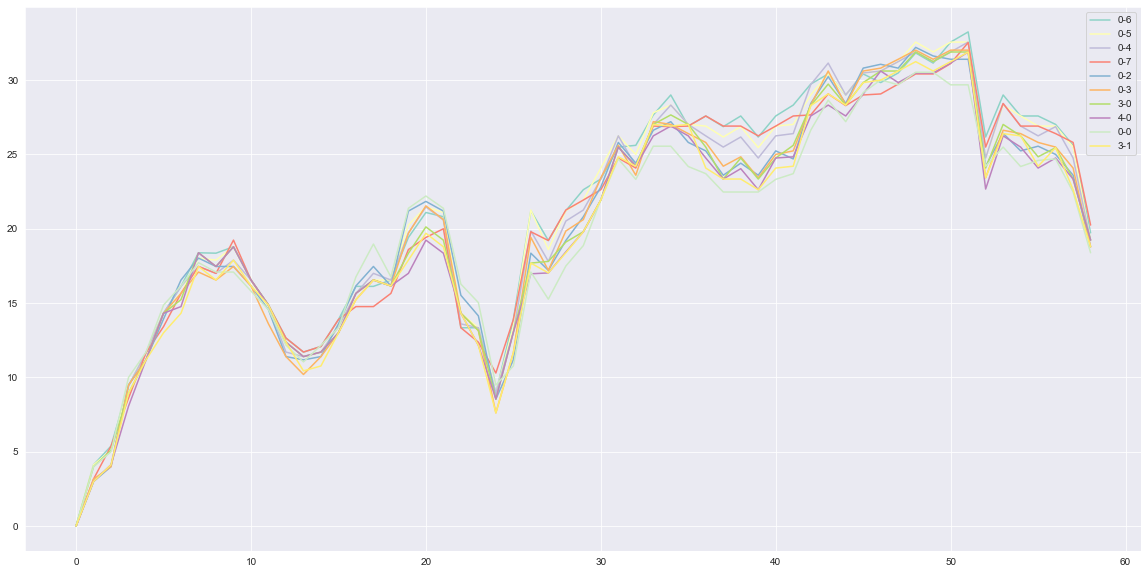

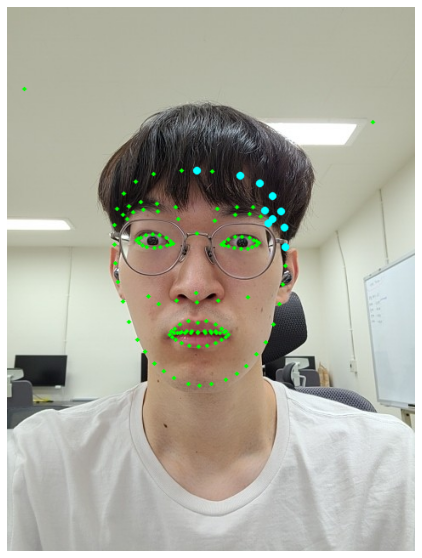

In [5]:
landmarks = pd.read_csv('../data/images/눈썹들어올리기/202208.23123145716.csv')
diff_list, landmarks_cut = show_diff(landmarks, 5)
make_flow_chart(part= 1, order = 10, image_order = 20, path= '../data/images/눈썹들어올리기/', data = landmarks_cut, diff_df= diff_list)

Index(['3-0', '4-0', '3-1', '3-2', '4-1', '4-2', '3-3', '4-3', '3-4', '4-4',
       '2-4', '1-3', '2-3', '2-0', '1-2', '1-4', '2-2', '1-1', '2-1', '1-0'],
      dtype='object')


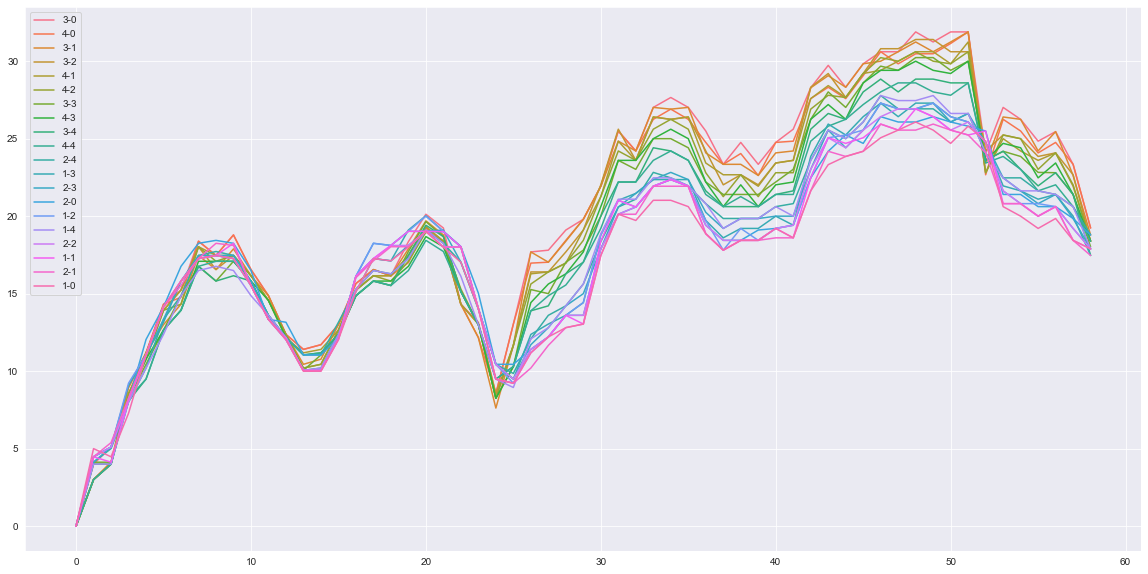

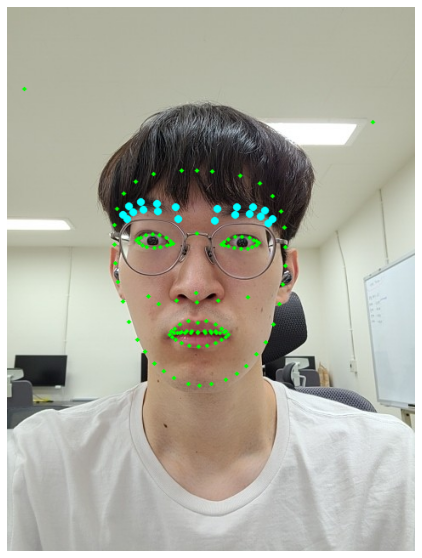

In [57]:
landmarks = pd.read_csv('../data/images/눈썹들어올리기/202208.23123145716.csv')
diff_list, landmarks_cut = show_diff(landmarks, 5, [1,2,3,4])
make_flow_chart(part= 1, order = 20, image_order = 20, path= '../data/images/눈썹들어올리기/', data = landmarks_cut, diff_df= diff_list)

## 3. 두 눈 감기

Index(['2-2', '2-3', '1-2', '2-1', '1-1', '1-3', '1-0', '2-0', '0-33', '1-4'], dtype='object')


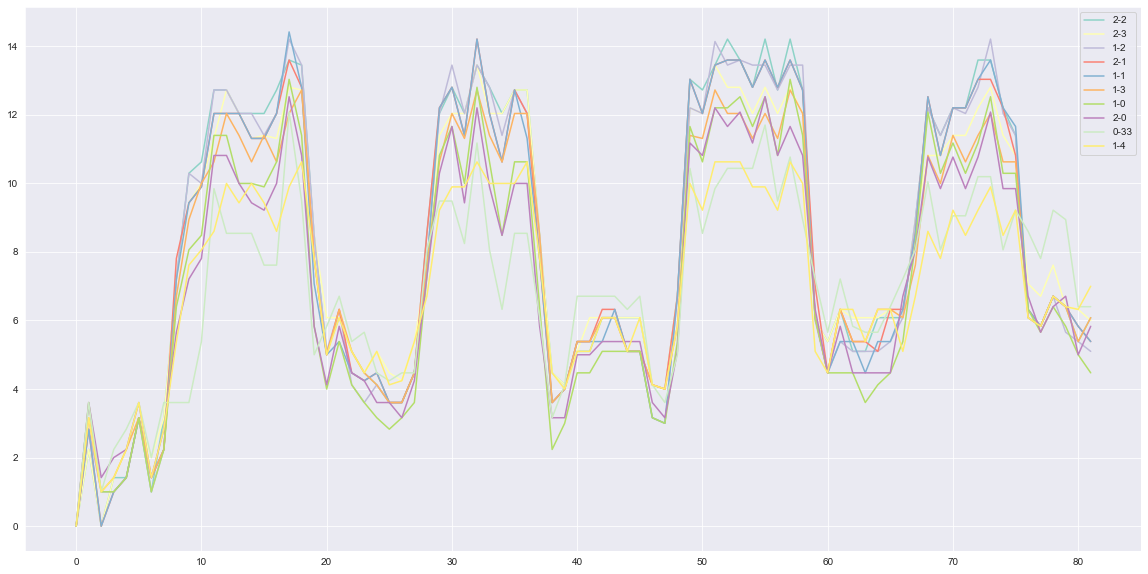

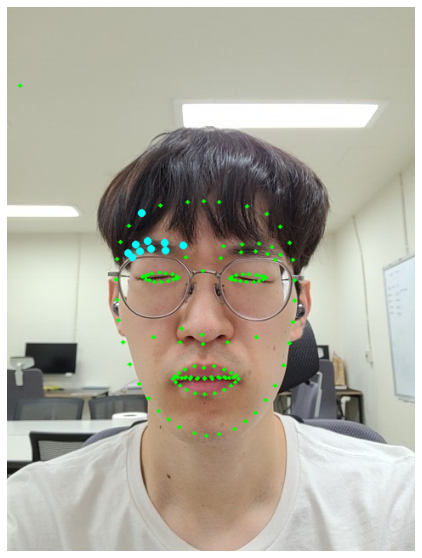

In [61]:
face = '두눈감기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122651407.csv')
diff_list, landmarks_cut = show_diff(landmarks, 5)
make_flow_chart(part= 1, order = 10, image_order = 15,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

Index(['5-2', '5-0', '5-1', '5-3', '5-14', '5-15', '5-13', '5-4', '5-12',
       '5-11', '5-5', '5-6', '5-10', '5-8', '6-4', '6-5', '5-9', '6-3', '6-6',
       '5-7', '6-7', '6-0', '6-2', '6-1', '6-8', '6-15', '6-9', '6-10', '6-11',
       '6-14', '6-12', '6-13'],
      dtype='object')


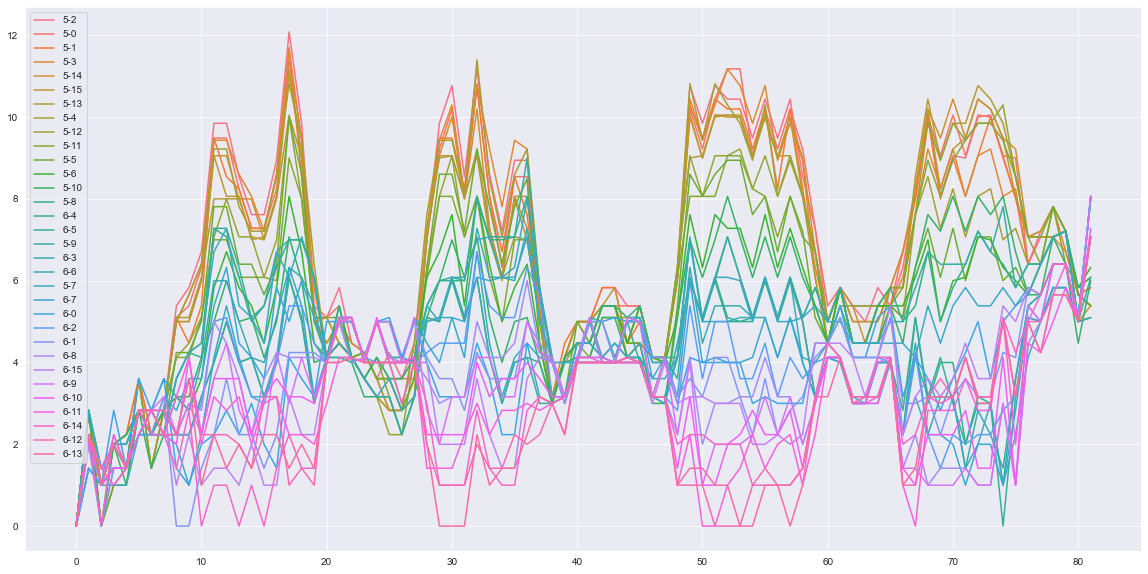

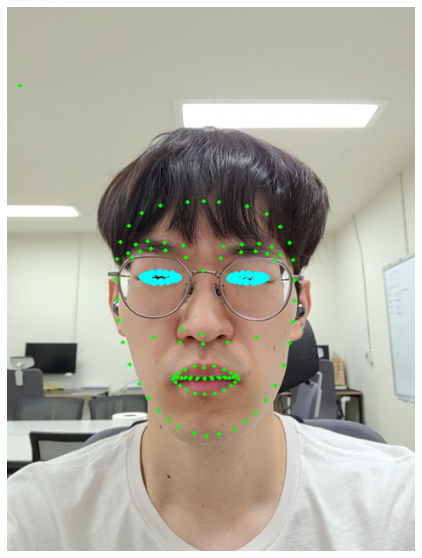

In [63]:
diff_list, landmarks_cut = show_diff(landmarks, 5, [5, 6])
make_flow_chart(part= 1, order = 64, image_order = 15,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

In [65]:
diff_list

0         1         2         3         4         5         6  \
5-2   0.0  2.828427       1.0       2.0  2.236068  3.605551  2.236068   
5-0   0.0  2.828427       0.0       2.0  1.414214  3.605551  1.414214   
5-1   0.0  2.828427       1.0       2.0  2.236068  3.605551  2.236068   
5-3   0.0  2.828427       0.0       1.0  1.414214  3.605551  1.414214   
5-14  0.0  2.828427       1.0       2.0  1.414214  3.605551  1.414214   
5-15  0.0  2.828427       1.0       2.0  2.236068  2.828427  2.236068   
5-13  0.0  2.828427       1.0       2.0  2.236068  2.828427  2.236068   
5-4   0.0  2.828427       0.0       1.0  1.414214  2.828427  2.236068   
5-12  0.0  2.828427       1.0       2.0       2.0  2.828427  2.236068   
5-11  0.0  2.236068       0.0       2.0  1.414214  3.605551  1.414214   
5-5   0.0  2.828427       0.0       1.0       1.0  2.828427  2.236068   
5-6   0.0  2.236068       1.0       2.0  2.236068  2.828427  2.236068   
5-10  0.0  2.828427       0.0       2.0       1.0  2.828427  1.414214   
5-8   0.0  2.236068       1.0       2.0  2.236068  2.828427  2.236068   
6-4   0.0  2.236068       1.0  1.414214  1.414214  2.236068  2.828427   
6-5   0.0  1.414214       1.0  1.414214  1.414214  2.236068  2.828427   
5-9   0.0  2.828427  1.414214       2.0       2.0  2.828427  2.236068   
6-3   0.0  2.236068       0.0  1.414214  1.414214  2.828427  2.828427   
6-6   0.0  1.414214       1.0       1.0       1.0  2.236068  2.236068   
5-7   0.0  2.828427  1.414214       2.0       2.0  2.828427  2.236068   
6-7   0.0  1.414214       1.0  1.414214  1.414214  2.236068  2.236068   
6-0   0.0       2.0       1.0  2.828427  1.414214  3.605551  2.828427   
6-2   0.0  1.414214       1.0  1.414214  1.414214  2.236068  2.236068   
6-1   0.0       2.0       0.0  1.414214  1.414214  2.828427  2.236068   
6-8   0.0  2.236068  1.414214  1.414214  1.414214  2.828427  2.828427   
6-15  0.0       2.0       1.0  2.236068  1.414214  2.828427  2.828427   
6-9   0.0  2.236068  1.414214  1.414214  1.414214  2.828427  2.828427   
6-10  0.0  2.236068       1.0  1.414214  1.414214  2.236068  2.828427   
6-11  0.0  2.236068  1.414214       1.0  1.414214  2.828427  2.828427   
6-14  0.0  2.236068       0.0  2.236068  1.414214  2.828427  2.236068   
6-12  0.0  2.236068  1.414214       2.0  1.414214  2.828427  2.828427   
6-13  0.0  2.236068       1.0       2.0  1.414214  2.828427  2.828427   

             7         8         9  ...         73        74        75  \
5-2   2.828427  5.385165  5.830952  ...  10.049876       9.0  8.062258   
5-0   2.828427   5.09902  5.385165  ...       10.0  9.055385       9.0   
5-1   2.828427   5.09902  4.472136  ...       10.0  9.055385       8.0   
5-3   2.828427       5.0  5.656854  ...   9.219544  8.062258  8.246211   
5-14  2.828427       5.0       5.0  ...  10.198039  9.486833  9.219544   
5-15  2.828427       5.0       5.0  ...  10.198039  9.486833  8.062258   
5-13  2.828427   5.09902   5.09902  ...  10.440307  9.848858  8.544004   
5-4   2.828427       5.0  5.656854  ...   8.246211       7.0   7.28011   
5-12  2.828427  4.123106  4.472136  ...   9.848858  10.29563  8.544004   
5-11  2.828427  4.123106  4.123106  ...   9.848858  9.433981  8.544004   
5-5   2.236068  4.242641  4.242641  ...   7.071068       6.0  6.324555   
5-6   2.828427  3.162278  2.828427  ...        7.0  6.324555       6.0   
5-10  2.236068  3.162278  3.162278  ...   7.615773  8.062258  6.708204   
5-8   2.828427  2.236068  2.236068  ...   6.708204  6.403124  5.830952   
6-4   2.236068  3.605551  4.242641  ...        3.0       1.0  3.605551   
6-5   2.236068  3.605551  4.242641  ...        3.0       0.0  3.162278   
5-9   2.236068  2.236068  2.236068  ...   6.708204   7.81025  5.830952   
6-3   3.605551  3.162278  2.828427  ...   2.236068  1.414214  3.605551   
6-6   2.236068  3.605551  4.242641  ...        3.0       1.0  2.236068   
5-7   2.236068       2.0       1.0  ...   5.385165  5.830952  5.385165   
6-7   3.162278  2.828427  3.605551  ...     

## 4. 두 눈 크게 뜨기

Index(['3-2', '3-3', '4-2', '1-3', '4-1', '3-4', '1-4', '4-3', '3-1', '0-2'], dtype='object')


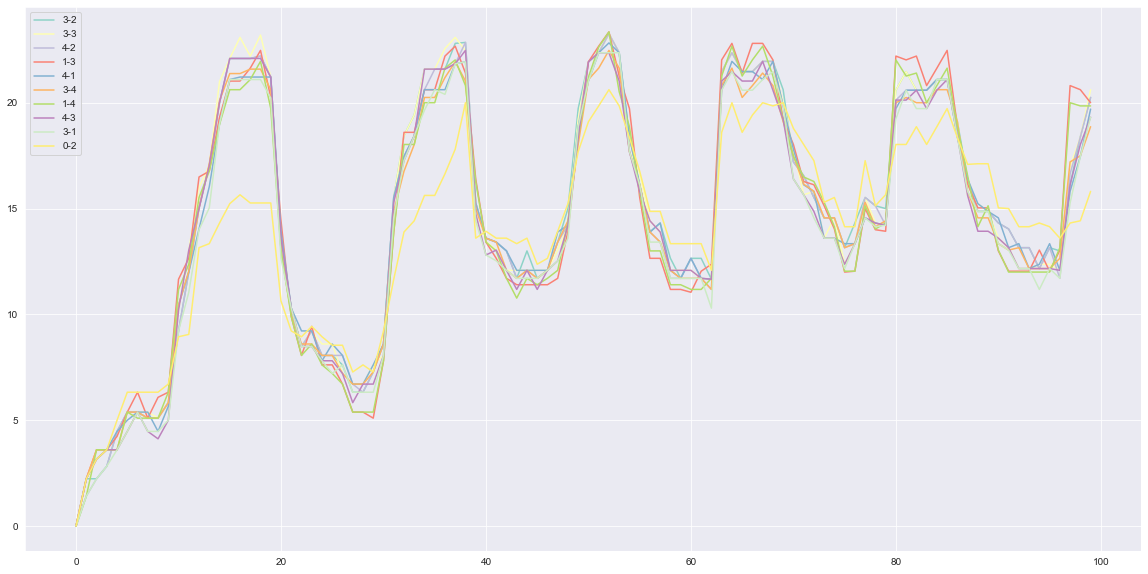

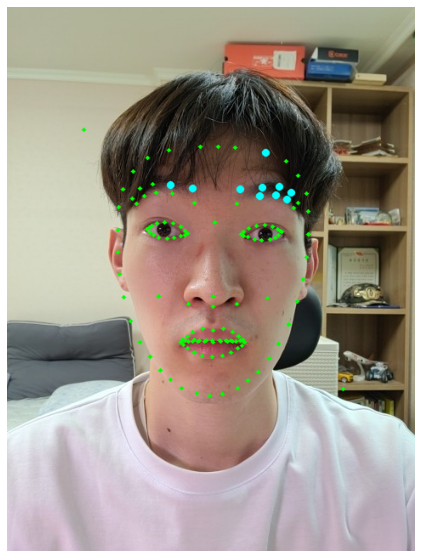

In [228]:
face = '두눈크게뜨기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.20172106650.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point] + ['left','top','right','bottom']]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 10, image_order = 7,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

## 9. 입벌리기

Index(['11-1', '12-1', '7-4', '12-2', '7-6', '4-3', '7-3', '12-0', '3-4',
       '7-5'],
      dtype='object')


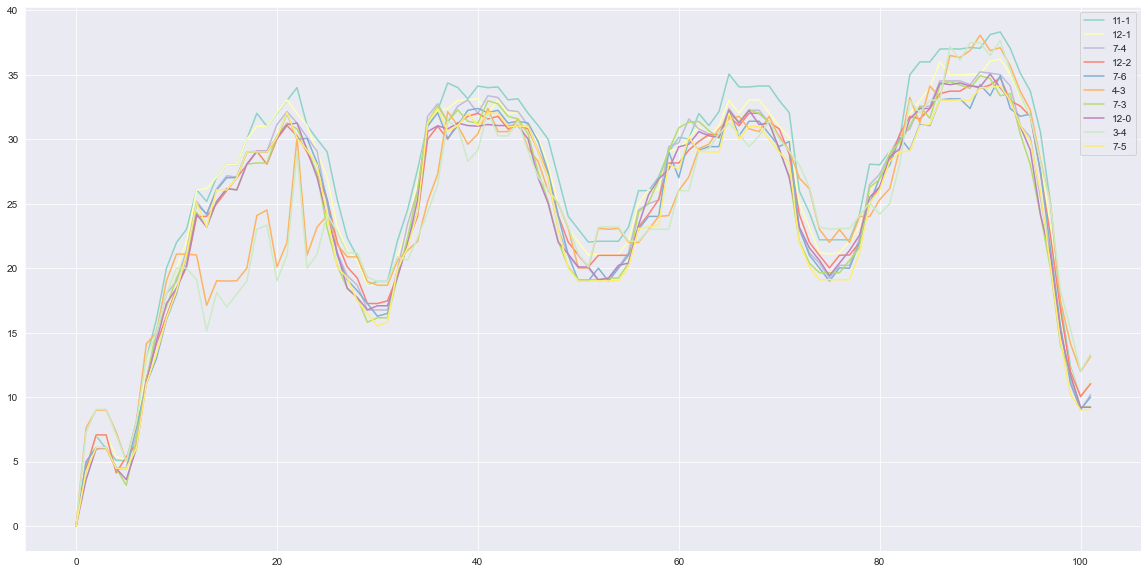

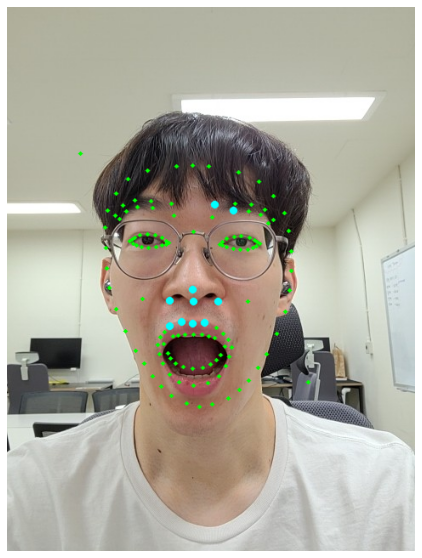

In [227]:
face = '입벌리기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122709306.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point] + ['left','top','right','bottom']]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 10, image_order = 8,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

> 입 크게 벌리니까 landmark 인식을 제대로 못함

## 10. 입술 오므리기

In [207]:
diff_list

0         1         2         3         4         5          6  \
11-1  0.0  4.472136       7.0       6.0   5.09902   5.09902   8.062258   
12-1  0.0  4.472136       7.0  7.071068  5.385165   5.09902   7.071068   
7-4   0.0       5.0  6.082763  6.082763  4.472136  4.472136   7.071068   
12-2  0.0  4.472136  7.071068  7.071068  4.123106  5.385165   6.324555   
7-6   0.0       5.0  6.082763  6.082763  4.472136  4.472136   7.615773   
...   ...       ...       ...       ...       ...       ...        ...   
9-5   0.0  4.472136       5.0       6.0  3.605551       1.0  20.024984   
9-6   0.0  4.242641   5.09902       5.0  2.828427  2.236068  18.027756   
9-3   0.0  4.242641   5.09902  6.082763  4.242641  2.236068  20.223748   
10-4  0.0  3.605551  4.123106       5.0  2.828427  4.123106  24.020824   
9-4   0.0  4.242641   5.09902   5.09902  3.605551  2.236068  21.023796   

              7          8          9  ...         93         94         95  \
11-1       13.0   16.03122       20.0  ...  37.054015  35.128336  33.734256   
12-1       13.0  15.033296  18.027756  ...  35.057096   33.24154  31.780497   
7-4   11.401754  14.866069  18.027756  ...  34.132096  31.064449  30.149627   
12-2  11.401754  14.142136  16.278821  ...  32.984845  32.572995  31.780497   
7-6   11.045361       13.0   16.03122  ...  32.388269  31.780497  31.953091   
...         ...        ...        ...  ...        ...        ...        ...   
9-5   19.416488  22.803509   21.84033  ...   4.472136  10.049876   6.403124   
9-6   17.464249  20.248457  19.313208  ...    5.09902   6.324555   2.828427   
9-3   20.024984       23.0  22.022716  ...   6.403124  12.806248       13.0   
10-4  23.021729  26.172505  25.179357  ...        5.0  13.601471  12.041595   
9-4   21.023796  24.186773  23.086793  ...    5.09902  12.649111       10.0   

             96         97         98         99        100        101  \
11-1  30.594117  25.079872  17.262677  12.369317       10.0   11.18034   
12-1  28.635642  23.194827  16.278821  12.165525       10.0   11.18034   
7-4   25.495098  21.095023  15.132746  11.401754        9.0  10.198039   
12-2  27.513633  22.561028  16.763055       12.0  10.049876  11.045361   
7-6   27.513633  21.587033  15.524175  11.045361   9.055385       10.0   
...         ...        ...        ...        ...        ...        ...   
9-5        13.0  17.117243  13.152946  11.401754   9.055385   9.219544   
9-6   12.649111  17.117243  13.038405  11.401754   8.062258   8.246211   
9-3   15.620499  17.720045  13.601471  11.045361   8.062258        9.0   
10-4  10.630146  15.297059  12.165525   11.18034        8.0   7.071068   
9-4   13.601471  17.464249  13.341664   11.18034   8.062258   8.062258   

              sum  
11-1  2717.354554  
12-1  2618.090733  
7-4   2529.596296  
12-2  2506.619874  
7-6   2478.467240  
...           ...  
9-5   1223.090920  
9-6   1215.924307  
9-3   1197.440073  
10-4  1167.237352  
9-4   1164.918326  

[133 rows x 103 columns]

In [242]:
landmarks

frame    top  bottom   left  right   0-0x   0-0y   0-1x   0-1y   0-2x  \
0      0.0  220.0   481.0   97.0  353.0  219.0  252.0  236.0  253.0  268.0   
1      1.0  219.0   475.0   97.0  353.0  219.0  244.0  237.0  245.0  268.0   
2      2.0  223.0   475.0  101.0  353.0  220.0  244.0  238.0  244.0  269.0   
3      3.0  223.0   475.0  101.0  353.0  220.0  244.0  238.0  244.0  269.0   
4      4.0  220.0   476.0   99.0  356.0  221.0  244.0  238.0  244.0  270.0   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
173  173.0  210.0   470.0   92.0  353.0  220.0  234.0  238.0  235.0  269.0   
174  174.0  210.0   470.0   92.0  353.0  221.0  233.0  239.0  234.0  270.0   
175  175.0  210.0   470.0   92.0  353.0  221.0  233.0  239.0  234.0  270.0   
176  176.0  212.0   468.0   92.0  348.0  218.0  233.0  236.0  234.0  267.0   
177  177.0  208.0   468.0   83.0  347.0  212.0  231.0  230.0  232.0  261.0   

     ...          6y          7x          7y          9x          9y  \
0    ...  378.885010  289.520203  392.618897  327.125214  363.726410   
1    ...  372.286285  291.716644  386.177429  328.763428  354.727966   
2    ...  371.950317  293.183441  384.722870  328.504730  356.808014   
3    ...  371.790680  292.513794  384.851196  329.487030  353.063751   
4    ...  373.299194  293.089142  386.152710  330.020019  358.241394   
..   ...         ...         ...         ...         ...         ...   
173  ...  365.096954  290.628540  380.918060  326.376434  347.494568   
174  ...  366.019318  290.850067  381.853882  326.399872  348.981018   
175  ...  365.930389  292.166809  380.488464  327.570587  346.988556   
176  ...  368.024506  287.134644  382.662445  321.633392  347.612793   
177  ...  364.735230  282.653809  378.490051  318.855194  347.996277   

            10x         10y         11x         11y  time_diff  
0    270.316132  325.566650  261.609314  434.875397          0  
1    272.242493  319.161743  261.578125  428.263031         80  
2    273.555298  317.862335  262.780090  427.921417         79  
3    273.990540  317.715118  261.537720  428.125702         81  
4    273.886780  319.359894  262.778381  429.576599         87  
..          ...         ...         ...         ...        ...  
173  271.788361  312.500610  258.779999  423.001068         86  
174  272.165680  313.381683  260.891449  422.448975         78  
175  272.151459  312.039551  263.802765  422.239044         84  
176  267.342651  314.049377  260.656433  423.907074         85  
177  262.634735  310.582703  256.831116  420.060242         78  

[178 rows x 292 columns]

Index(['0-30', '0-29', '0-31', '0-27', '0-32', '0-28', '0-33', '0-25', '1-0',
       '0-26'],
      dtype='object')


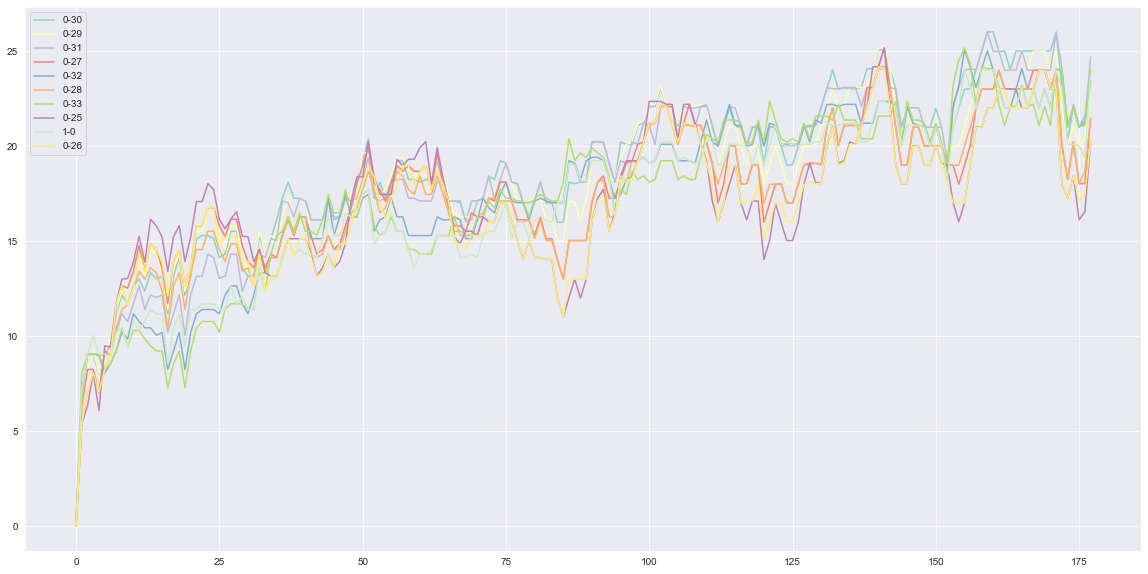

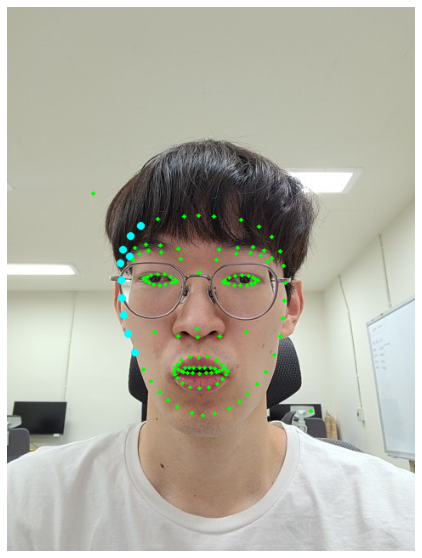

In [241]:
face = '입술오므리기2'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23143251488.csv')
landmarks = landmarks.dropna()
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point] + ['left','top','right','bottom']]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 10, image_order = 10,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

## 16. 미소짓기

Index(['7-1', '7-0', '7-2', '8-0', '8-1', '8-2', '7-9', '10-8', '7-10', '7-3'], dtype='object')


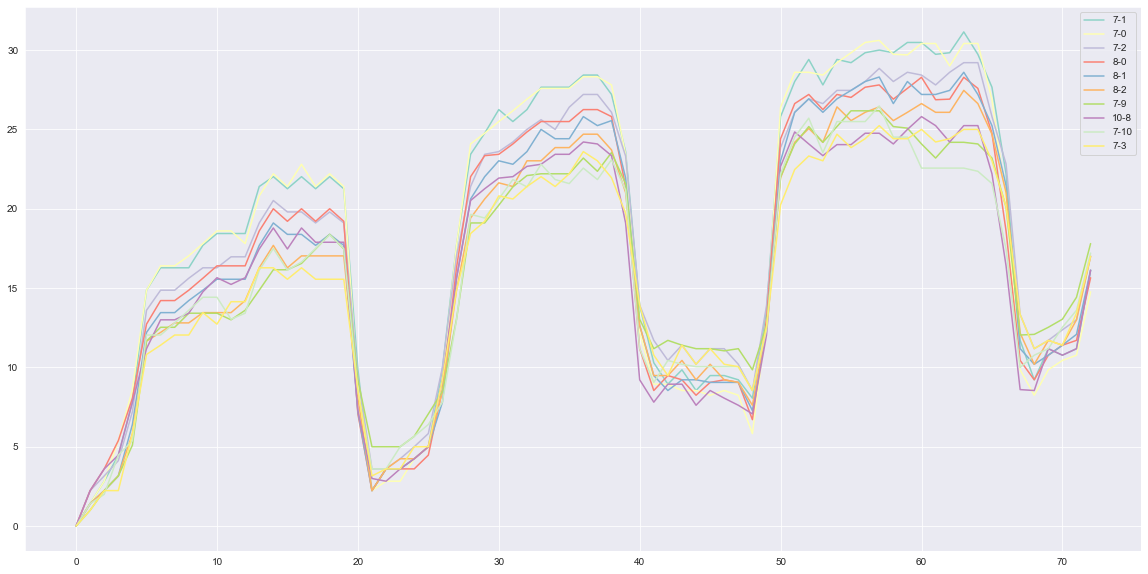

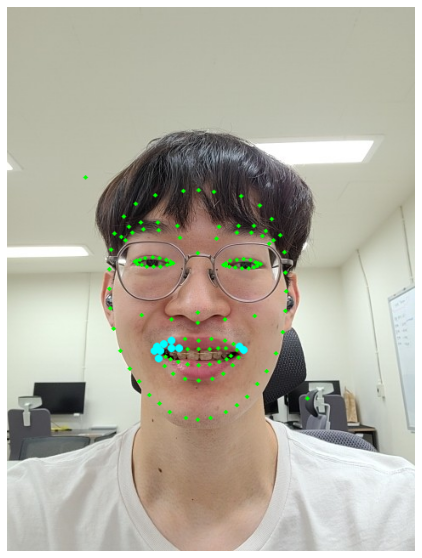

In [232]:
face = '미소짓기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122804433.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point] + ['left','top','right','bottom']]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 10, image_order = 13,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)